# Деревья решений.Домашнее задание



дедлайн: 20.05.16

In [1]:
import math
import numpy as np
import pandas as pd

from sklearn.cross_validation import train_test_split
from sklearn import tree
from sklearn import metrics

import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

from IPython.core.display import display


Загрузите [данные](https://www.dropbox.com/s/3t1moa1wpflx2u9/california.dat?dl=0).

**Задание 1:** Найти оптимальную глубину дерева.<br/>
Разделите выборку на train-test в пропорции 70/30.<br/>
Обучите деревья с глубиной от `1` до `30`. Для каждой глубины расчитайте среднюю квадратичную ошибку на train и на test<br/>
Изобразите эти ошибки на одном графике, сделайте вывод по поводу оптимальной глубины дерева.

In [2]:
#посмотрим на данные, которые загрузили
df = pd.read_table('california.dat', sep = ',')
print(df.columns)
display(df.head())
df.shape

Index(['Longitude', 'Latitude', 'HousingMedianAge', 'TotalRooms',
       'TotalBedrooms', 'Population', 'Households', 'MedianIncome',
       'MedianHouseValue'],
      dtype='object')


,Longitude,Latitude,HousingMedianAge,TotalRooms,TotalBedrooms,Population,Households,MedianIncome,MedianHouseValue
0,-117.03,32.78,17,5481,1618,2957,1537,2.5707,171300
1,-118.23,33.80,26,239,135,165,112,1.3333,187500
2,-122.46,37.71,39,2076,482,1738,445,3.1958,232100
3,-122.06,37.94,19,4005,972,1896,893,2.5268,235700
4,-122.87,38.68,32,4073,718,2053,629,3.7352,228000


(20640, 9)

In [3]:
#разделим выборку в пропорции 70/30
train, test = train_test_split(df, test_size = 0.3)
print(train.shape, test.shape)

(14448, 9) (6192, 9)


In [4]:
#разделим признаки и ответы для каждой выборки
features = ['Longitude', 'Latitude', 'HousingMedianAge', 'TotalRooms',
 'TotalBedrooms', 'Population','Households', 'MedianIncome']
target = ['MedianHouseValue']
X_train = train[features]
Y_train = train[target]
X_test = test[features]
Y_test = test[target]

In [5]:
#обучим деревья разной глубины
train_error_list = []
test_error_list = []
for i in range(1, 31):
    regr = tree.DecisionTreeRegressor(max_depth = i)
    regr.fit(X_train,Y_train)
    answer_train = regr.predict(X_train)
    answer_test = regr.predict(X_test)
    error_train = metrics.mean_squared_error(Y_train, answer_train)
    error_test = metrics.mean_squared_error(Y_test, answer_test)
    train_error_list.append(error_train)
    test_error_list.append(error_test)

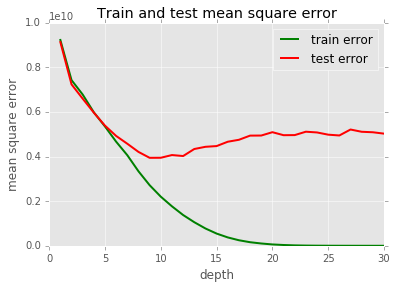

In [6]:
#графически покажем среднеквадратичные ошибки для обоих выборок
plt.plot(np.arange(1,31), train_error_list,  c="g", label = "train error", linewidth = 2)
plt.plot(np.arange(1,31), test_error_list, c="r", label = "test error", linewidth = 2)
plt.legend()
plt.xlabel("depth")
plt.ylabel("mean square error")
plt.title("Train and test mean square error")

In [7]:
for i in range(30):
    if train_error_list[i] == min(train_error_list):
        print("min train error = " + str(min(train_error_list)) + "(for depth = " + str(i+1) +')')
for i in range(30):
    if test_error_list[i] == min(test_error_list):
        print("min test error = " + str(min(test_error_list)) + "(for depth = " + str(i+1) +')')

min train error = 260470.686337(for depth = 30)
min test error = 3941889857.27(for depth = 9)


**Вывод:** Очевидно, что для обучающей выборки оптимальна максимальная глубина дерева(30), так как при достаточно большой глубине дерева всегда можно получить нулевую ошибку. Действительно оптимальной глубиной решающего дерева является оптимальная глубина для тестовой выборки. Для тестовой выборки оптимальная глубина - около 10, так как при такой глубине получется наименьшая ошибка на тестовой выборке.(При нескольких генерациях получались различные ответы про оптимальную глубину: 9, 10, 11..) При глубине, меньшей чем оптимальная, происходит недообучение: алгоритм обладает плохой предсказательной способностью и на обучающей, и на тестовой выборке. При глубине, большей чем оптимальная, происходит переобучение: алгоритм обладает хорошей предсказательной способностью на обучающей,но выдает плохой результат на тестовой выборке. 

**Задание 2:** Выведите важности признаков. Для этого воспользуйтесь `DecisionTreeRegressor.feature_importances_`

In [8]:
#выведем важность признаков для оптимальной глубины дерева
regr = tree.DecisionTreeRegressor(max_depth = 10)
regr.fit(X_train,Y_train)
importances = regr.feature_importances_
print('Features importances:')
for i in range(8):
    print("imortance of " + features[i] + " = " + str(importances[i]))

Features importances:
imortance of Longitude = 0.172298058499
imortance of Latitude = 0.159866042102
imortance of HousingMedianAge = 0.0623359133383
imortance of TotalRooms = 0.00664979515503
imortance of TotalBedrooms = 0.0096687248313
imortance of Population = 0.0119006424305
imortance of Households = 0.0079601278436
imortance of MedianIncome = 0.5693206958


**Задание 3:** Поразмышляйте на темы:
* Обработки пропусков в данных.
* Как сделать разделяющие плоскости непараллельные осям?

** Обработка пропусков в данных.**

*(здесь описаны идеи обработки таблицы с данными для того, чтобы подставить ее в стандартный-встроенный алгоритм предсказания)*

Для каждой конкретной задачи должен быть выбран свой способ обработки данных,который будет отвечать требованиям именно этой задачи.

1)Представим задачу, в которой содержится очень много данных и процент пропусков незначителен по сравнению с этим количетвом данных. В такой задаче на стадии обучения можно просто "выкинуть" из обучающей выборки объекты с пропусками. Предсказание будет довольно точным, так как мы никак не заменяем пропуски, то есть не "придумываем" им значение. Однако могут возникнуть проблемы с тестовой выборкой: если там попадется объект с пропуском, алгоритм предсказания не будет знать, что делать с этим объектом.

2.1)Представим задачу, в которой нельзя просто "выкинуть" объекты с пропусками, тогда можно заменить пропущенные значения, например, на среднее/наиболее часто встречающееся/медианное/и др. значение по конкретному признаку на данной выборке. Такая замена должна быть сделана как на обучающей, так и на тестовой выборке. Однако в каждом отдельном случае нужно чётко понимать, почему именно такая замена уместна в данной задаче.

2.2)Если сложно подобрать подходящую замену пропущенному значению(как было описано в пункте 2.1), то можно попробовать построить предсказание пропущенного значения на основе объектов без пропусков.

3)Представим задачу, в которой пропуск значения играет большую роль, например, проводится социологический опрос, и люди намеренно утаивают информацию, тогда пропущенное значение может дать нам дополнительный признак, по которому можно строить предсказание. Однако даже в таком случае требуется обработка пропусков в данных, например, пропущенный признак можно заменить дефолтным(очень большим или, наоборот, слишком маленьким) значением, котрое будет характеризовать именно пропуск в данных.
Также для получения более точных результатов, можно не только заменить пропущенные значения дефолтными, но и по каждому признаку создать дополнительный столбец, в котором ставить 1, если значение для объекта присутствует, и 0, если пропуск значения. Это поможет лучше разделить дефолтные  и реальные значения.


*(если же мы не используем стандартные, уже написанные кем-то, алгоритмы классификации, а, например, вручную программируем алгортим решающего дерева, то к проблеме пропусков в данных можно подойти с точки зрения конструирования решающего дерева)*
 
1)Если мы встечаем пропуск значения в обучающей выборке(допустим, пропуск значения по признаку Х1), то при разделении выборки по признаку Х1 мы просто не учитываем объекты с пропусками при вычислении меры неопределенности.

Также при обучении стоит предпринять некоторые действия, которые далее будут использоваться для обработки пропусков данных на тестовой выборке:

* для каждой внутренней вершины посчитать долю элементов, уходящих в правую дочернюю вершину, и долю элементов, уходящих в левую дочернюю вершину(используются, как вероятности попасть из данной вершины в правую или левую дочерние вершины)

* для каждой листовой вершины посчитать долю элементов, относящихся к, условно, классу +1, и долю элементов, относящихся к классу -1(используются, как вероятности объекта принадлежать тому или иному классу при попадании в данную листовую вершину)

2)Когда мы пропускаем объект по уже построенному(как в пункте 1) дереву, в каждой внутренней вершине(разделяющей по признаку Х1) есть два варанта:

* либо значение по признаку Х1 не пропущено, тогда объект пропускается только в ту ветвь, которая соответствует значению его признака.

* либо значение по признаку Х1 пропущено, тогда объект пропускается в обе дочерние вершины с весами-вероятностями, котрые мы описали в пункте 1, как доли элементов, уходящих в правую и левую вершны.

Заметим, что пропуски значений у объекта могут быть по нескольким признакам.
После проведения процедуры, которую мы описали выше, объект попадает в несколько(если есть пропуски значений, иначе только в одну) листовых вершин, в каждой из которых посчитана вероятность принадлежности объекта классам +1 и -1. После этого считается апостериорная вероятность принадлежности данного объекта к классу +1 или -1, которая учитывает все веса, с которыми мы пропускали данный объект в разные ветви. Объекту присваивается тот класс, чья апостериорная вероятность больше.


In [9]:
#посмотрим, есть ли пропуски значений в данной таблице
df.isnull().any().any()

False

*Отлично, пропусков в данной таблице нет!*

**Как сделать разделяющие плоскости непараллельные осям**

Рассмотрим данный вопрос на примере двух признаков Х1 и Х2. Стандартный механизм установления разделяющей плоскости выглядит, например, так Х1 = const1, то есть в каждой внутренней вершине рассматривается только один признак, по которому происходит разделение.

Можно предложить следующее решение задачи более сложного установления разделяющих плоскостей:

* Во-первых, в вершине дерева можно рассмотреть пару признаков, например, объекты, для которых Х1 < const1 одновременно с Х2 < const2, отправляются в правую вершину, а все остальные - в левую.(Разделяющая поверхность, описанная данным механизмом, по-пержнему параллельна осям, в некотором смысле, однако эта поверхность теперь имеет более сложную форму - форму "уголка")

* Во-вторых, в вершине дерева можно рассмотреть разделяющую плоскость через пару признаков следующим образом: const1xX1 + const2xX2 = const3. При этом объекты, для которых const1xX1 + const2xX2 < const3, отправляются, например, в правую вершину, а все остальные - в левую.(Разделяющая плоскость, описанная данным механизмом, не является параллельной осям, если только не вырожденные случаи).